In [1]:
import pandas as pd
import matplotlib.pyplot as mt
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\police.csv")
df.head(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [4]:
df.drop(["county_name","search_type"],axis=1,inplace=True)

In [5]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [6]:
df.shape

(91741, 13)

In [7]:
df.isnull().sum().sum()

np.int64(48281)

In [8]:
df.dropna(how="any",inplace=True)

In [9]:
df.shape

(86113, 13)

In [10]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [11]:
df["stop_outcome"]=df["stop_outcome"].str.replace('N/D',"No Date")

In [12]:
soft=df["violation"]

In [13]:
soft=df["violation"].str.split("/",expand=True).stack()
soft=soft.to_frame()
soft.columns=["violation_1"]
violation_1=soft.groupby(["violation_1"]).size()
violation_1=violation_1
violation_1.sort_values(ascending=False)

violation_1
Speeding            48359
Moving violation    16164
Equipment           11007
Other                4204
Registration         3427
plates               3427
Seat belt            2952
dtype: int64

In [14]:
mt.style.use("default")

Text(0.5, 1.0, 'Overall Crimes')

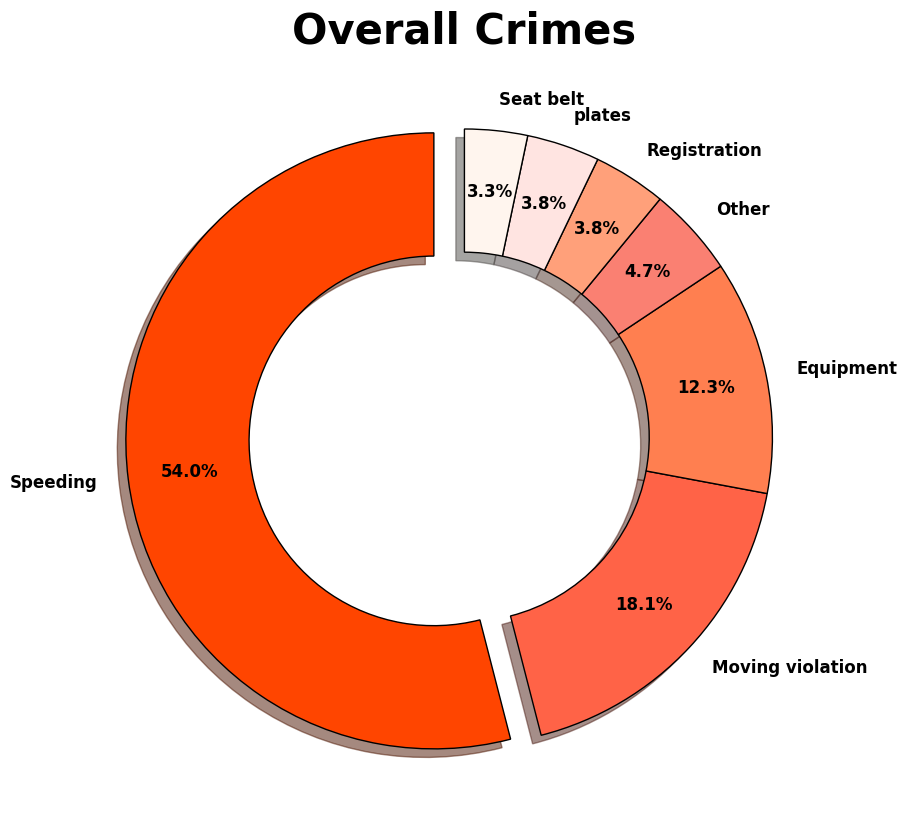

In [15]:
violet=violation_1.sort_values(ascending=False)
violet.plot(figsize=(10,10),kind='pie',startangle=90,
            shadow=True,autopct="%0.1f%%",pctdistance=0.8,
           explode=[0.1,0,0,0,0,0,0],wedgeprops={'edgecolor':"black",'width':0.4},
           textprops={"fontweight":'bold','size':12},
            colors=["orangered","tomato",'coral','salmon','lightsalmon','mistyrose','seashell'])

mt.title("Overall Crimes",fontweight="bold",size=30)


In [16]:
r=df.groupby(["driver_gender","violation"]).stop_time.count().unstack()
r

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2484,3195,685,1012,635,15453
M,8523,12969,3519,2415,2317,32906


In [17]:
mt.style.use("dark_background")

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000'),
  Text(0, 35000.0, '35000')])

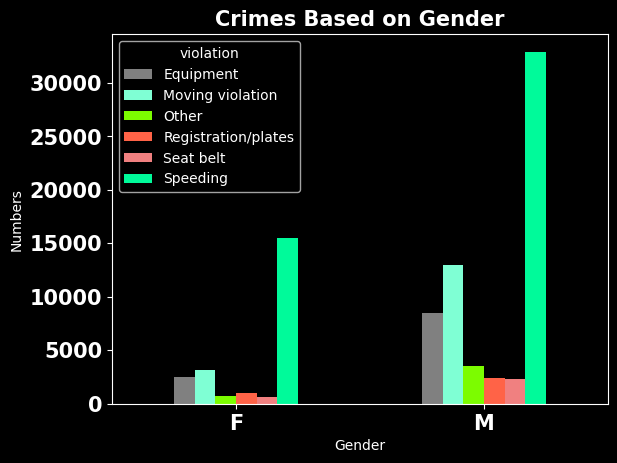

In [18]:
r.plot(kind='bar',color=["grey","aquamarine","lawngreen","tomato","lightcoral","mediumspringgreen"])

mt.title("Crimes Based on Gender",size=15,fontweight='bold')
mt.xticks(rotation=0,size=15,fontweight='bold')
mt.xlabel("Gender",size=10,fontweight='medium')
mt.ylabel('Numbers',size=10,fontweight='medium')
mt.yticks(size=15,fontweight='bold')

In [19]:
df["stop_outcome"].unique()

array(['Citation', 'Arrest Driver', 'No Date', 'Warning',
       'Arrest Passenger', 'No Action'], dtype=object)

In [20]:
arest=df.groupby(["driver_gender","is_arrested"]).size().unstack()
arest

is_arrested,False,True
driver_gender,,
F,22870,594
M,60318,2331


In [21]:
mt.style.use("default")

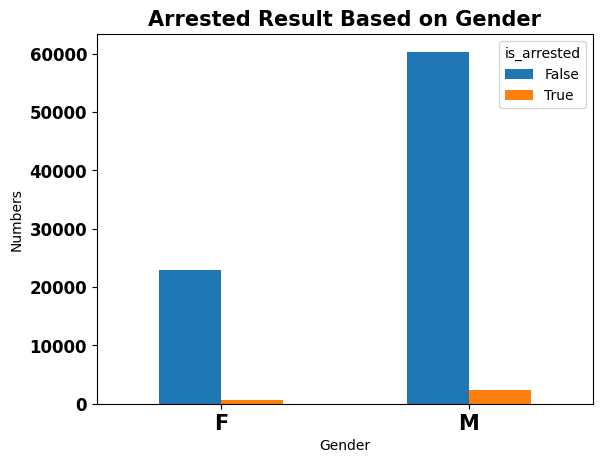

In [22]:
arest.plot(kind='bar')
mt.title("Arrested Result Based on Gender",fontweight='semibold',size=15)
mt.xticks(rotation=0,size=15,fontweight='bold')
mt.xlabel("Gender",size=10,fontweight='medium')
mt.ylabel('Numbers',size=10,fontweight='medium')
mt.yticks(size=12,fontweight='bold')
mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Arrested Result Based on Gender.jpeg')

In [23]:
result=df.groupby(["driver_gender","stop_outcome"]).stop_date.count().unstack()
result

stop_outcome,Arrest Driver,Arrest Passenger,Citation,No Action,No Date,Warning
driver_gender,,,,,,
F,466,128,21069,182,127,1492
M,2101,230,55752,381,463,3722


In [141]:
mt.style.use("classic")

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000')])

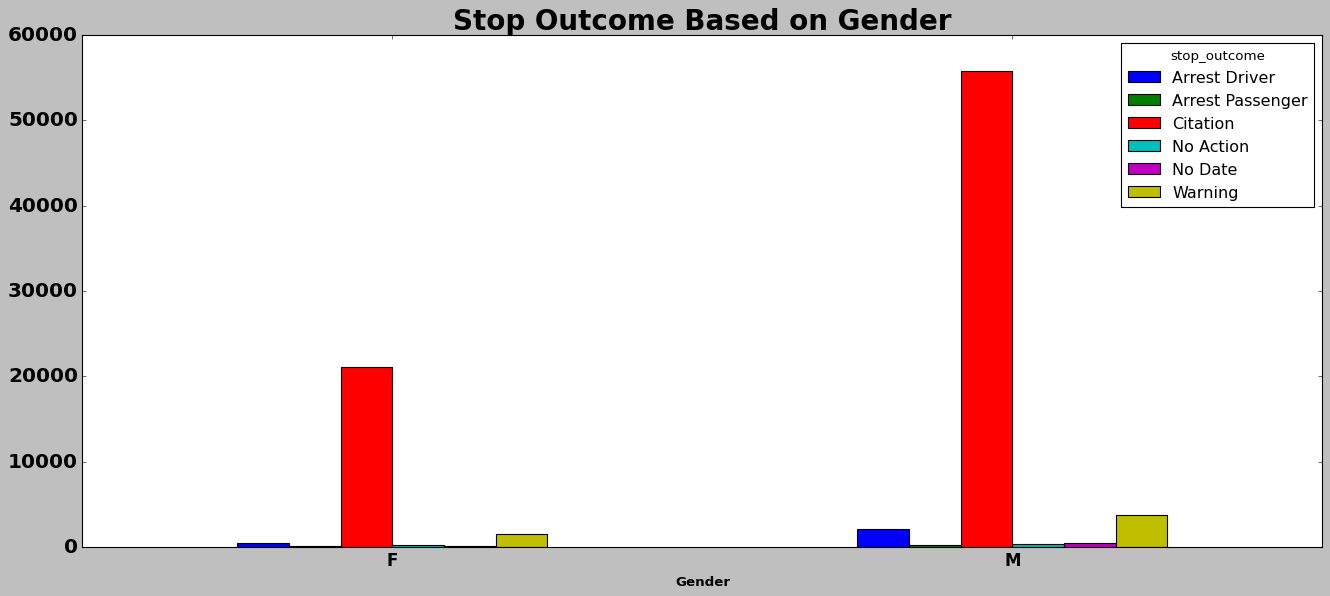

In [142]:
result.plot(kind='bar',figsize=(20,8))
mt.xticks(rotation=0,fontweight='semibold',size=15)
mt.xlabel("Gender",fontweight='semibold',size=12)
mt.title("Stop Outcome Based on Gender",fontweight='bold',size=25,color='black')
mt.yticks(fontweight='semibold',size=18)


In [26]:
arrested=df.groupby(["driver_gender",'driver_race'])['is_arrested'].count().unstack()
arrested.style.background_gradient(cmap="tab20c")

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,511,2577,1867,26,18483
M,1742,9620,7610,213,43464


In [27]:
F_1=df.groupby(["driver_race","violation"]).stop_outcome.count().unstack()
F_1

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_race,,,,,,
Asian,201,334,77,58,58,1525
Black,2202,2871,867,783,450,5024
Hispanic,2143,2405,575,716,551,3087
Other,16,51,21,2,2,147
White,6445,10503,2664,1868,1891,38576


In [28]:
mt.style.use("default")

Text(0, 0.5, 'Numbers')

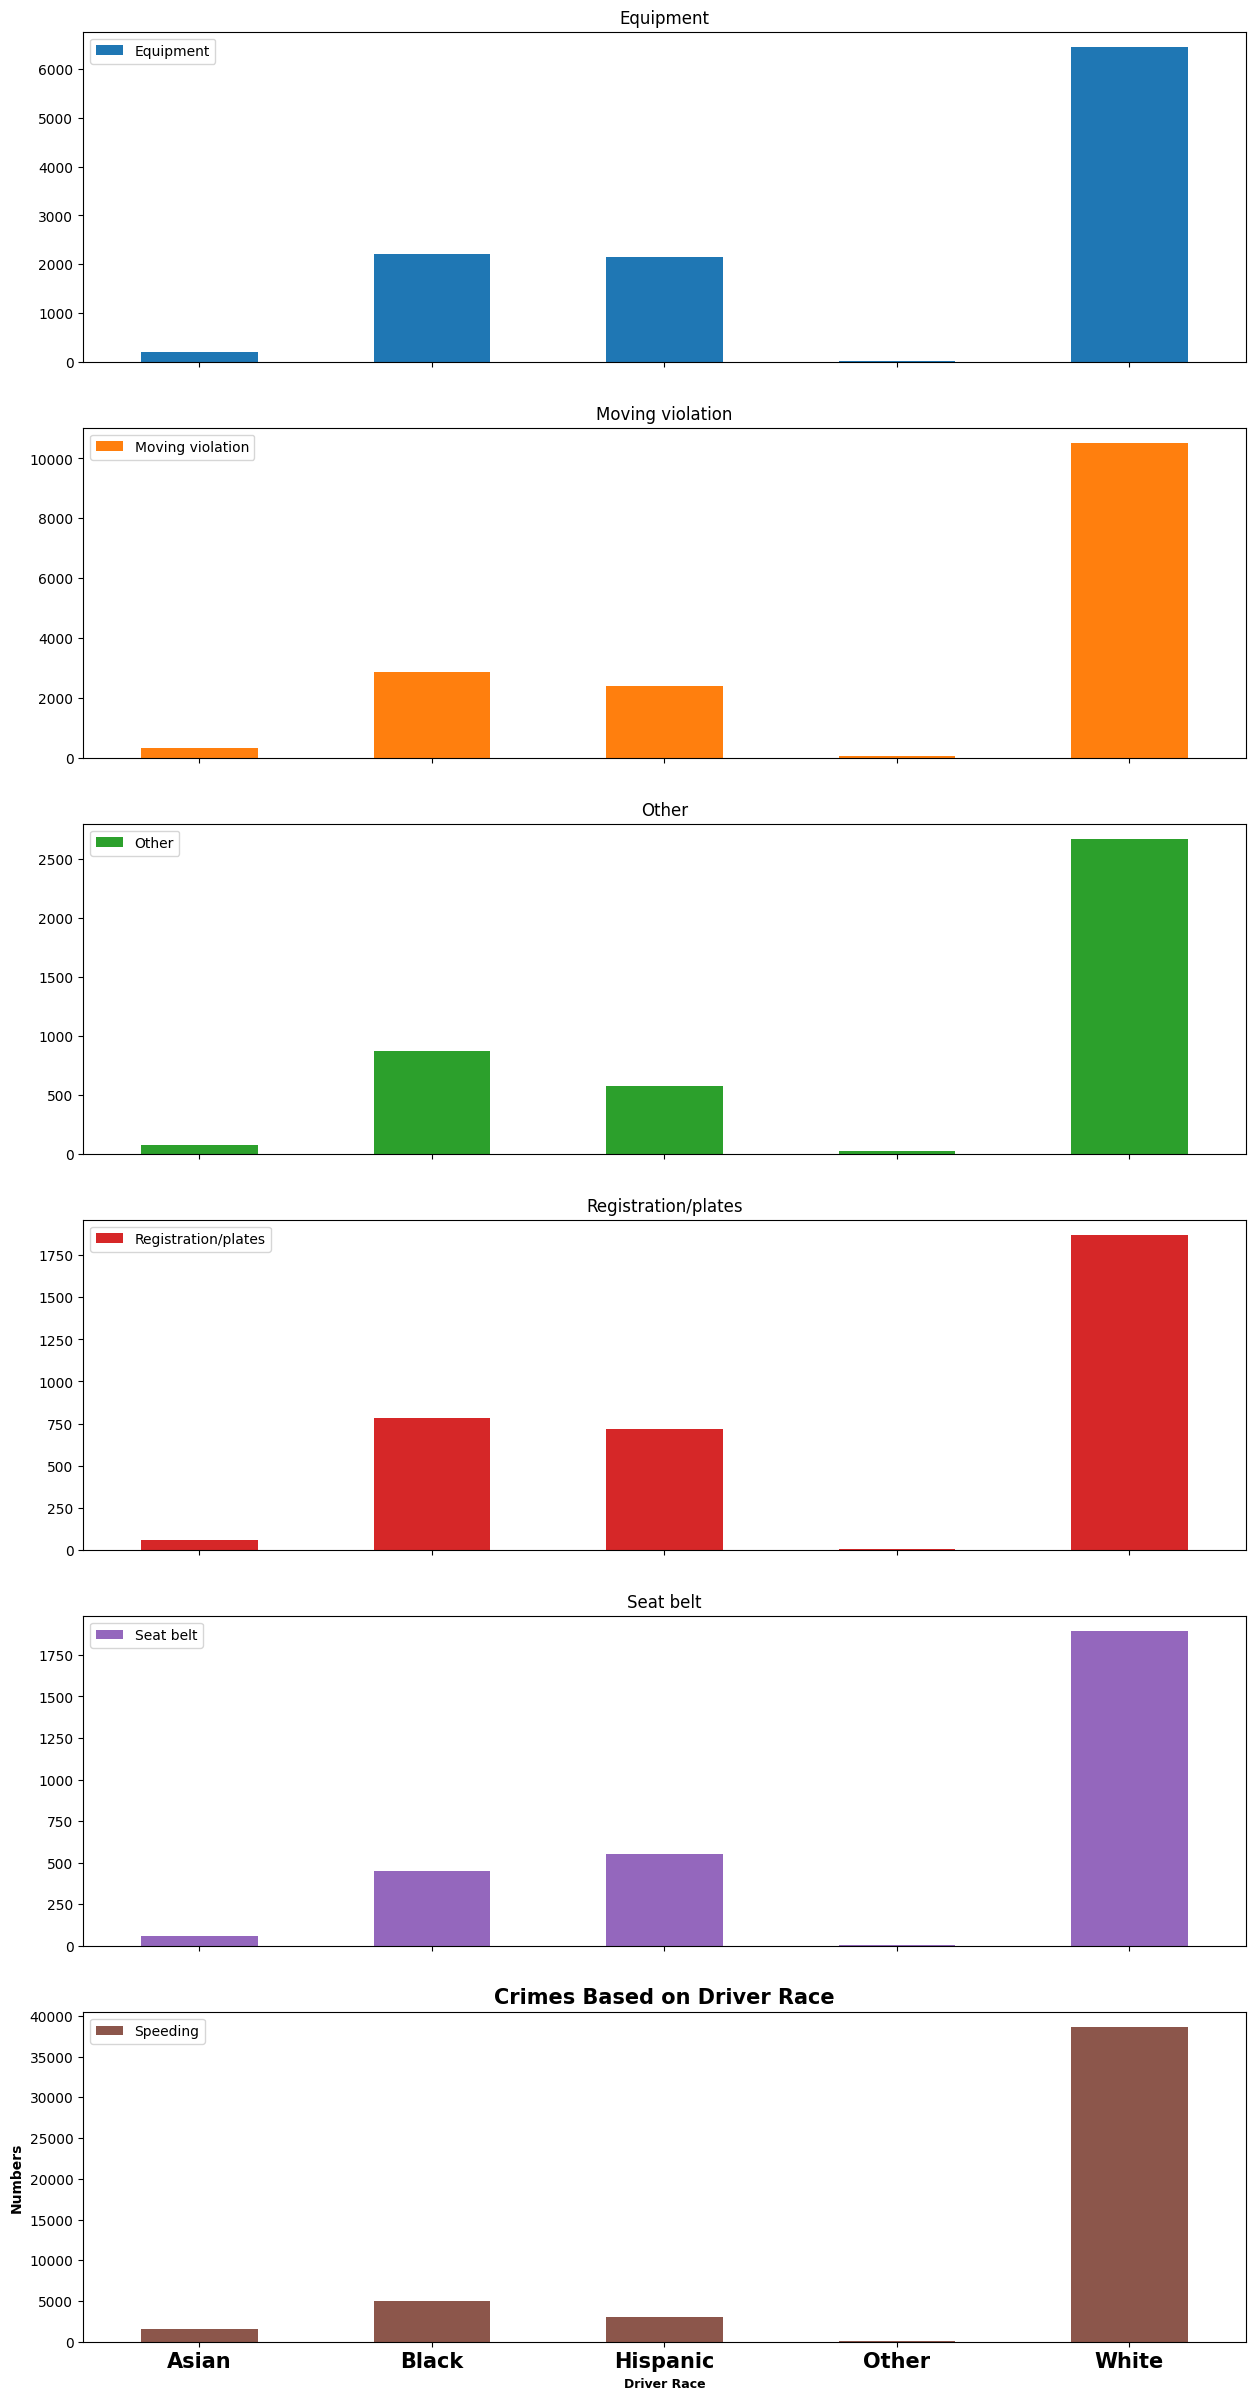

In [29]:
F_1.plot(figsize=(15,30),kind="bar",subplots=True)
mt.title("Crimes Based on Driver Race",fontweight='bold',size=15)
mt.xticks(fontweight='bold',rotation=0,size=15)
mt.xlabel("Driver Race",fontweight='bold',size=9)
mt.ylabel("Numbers",fontweight='bold',size=10)


In [30]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

In [31]:
drive=df.groupby(["driver_race","stop_outcome"]).stop_time.count().unstack()
drive

stop_outcome,Arrest Driver,Arrest Passenger,Citation,No Action,No Date,Warning
driver_race,,,,,,
Asian,36,5,2104,13,11,84
Black,599,105,10421,79,119,874
Hispanic,499,66,8053,92,75,692
Other,1,1,216,3,2,16
White,1432,181,56027,376,383,3548


In [32]:
taco=drive.loc[["Black","White"]]
taco

stop_outcome,Arrest Driver,Arrest Passenger,Citation,No Action,No Date,Warning
driver_race,,,,,,
Black,599,105,10421,79,119,874
White,1432,181,56027,376,383,3548


In [33]:
mt.style.use("dark_background")

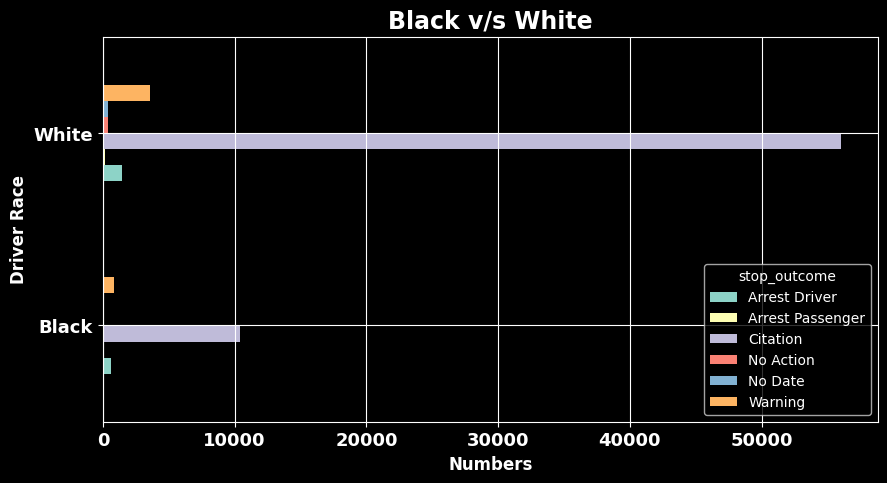

In [34]:
taco.plot(figsize=(10,5),kind='barh',linewidth=1)


mt.title("Black v/s White",fontweight='bold',size=17)
mt.xticks(rotation=0,fontweight='bold',size=13)
mt.xlabel("Numbers",fontweight='bold',size=12)
mt.yticks(fontweight='bold',size=13)
mt.ylabel("Driver Race",fontweight='bold',size=12)
mt.grid("lines")


In [35]:
mt.style.use("default")

In [36]:
tr=df.groupby(["driver_gender",'search_conducted']).stop_time.count().unstack()
tr

search_conducted,False,True
driver_gender,,
F,22993,471
M,59927,2722


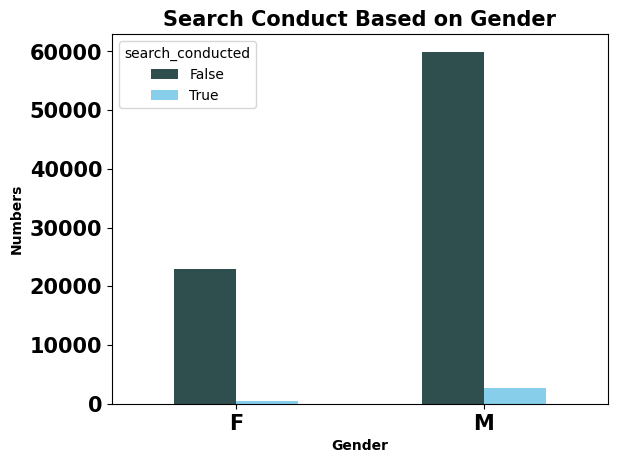

In [37]:
tr.plot(kind="bar",color=['darkslategrey','skyblue'])
mt.title("Search Conduct Based on Gender",fontweight='bold',size=15)
mt.xticks(rotation=0,fontweight='bold',size=15)
mt.xlabel("Gender",fontweight='bold',size=10)
mt.ylabel("Numbers",fontweight='bold',size=10)
mt.yticks(fontweight='bold',size=15)
mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Search Conduct Based on Gender.jpeg')

In [38]:
drug=df.groupby("driver_race").drugs_related_stop.count().sort_values(ascending=False)
drug

driver_race
White       61947
Black       12197
Hispanic     9477
Asian        2253
Other         239
Name: drugs_related_stop, dtype: int64

In [39]:
dru=df.groupby(["driver_race","drugs_related_stop"]).size().unstack()
dru.style.background_gradient(cmap='berlin')

drugs_related_stop,False,True
driver_race,,
Asian,2242,11
Black,11996,201
Hispanic,9351,126
Other,238,1
White,61472,475


In [40]:
mt.style.use("default")

In [41]:
dar=df.groupby(["driver_race","is_arrested"]).stop_time.count().unstack()
dar.style.background_gradient(cmap="Set3")

is_arrested,False,True
driver_race,,
Asian,2212,41
Black,11493,704
Hispanic,8912,565
Other,237,2
White,60334,1613


In [42]:
# dar.plot(kind='barh',color=["orangered","black"])
# mt.title("Arrested Result Based on Driver Race",fontweight='bold',size=15)
# mt.xticks(fontweight='bold',size=10)
# mt.yticks(fontweight='bold',size=15)
# mt.ylabel(" ")

In [43]:
arr=df.groupby(["driver_race","violation",'is_arrested']).stop_time.size().unstack()
arr.style.background_gradient(cmap="cividis")

In [44]:
r=df.groupby('violation_raw').stop_date.count()
r

violation_raw
APB                                    78
Call for Service                     1288
Equipment/Inspection Violation      11007
Motorist Assist/Courtesy              189
Other Traffic Violation             16164
Registration Violation               3427
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2369
Speeding                            48359
Suspicious Person                      54
Violation of City/Town Ordinance      211
Warrant                                15
Name: stop_date, dtype: int64

In [45]:
raw=df["violation_raw"]

In [46]:
raw=df["violation_raw"].str.split("/",expand=True).stack()
raw=raw.to_frame()
raw.columns=["violence"]
violence=raw.groupby(["violence"]).size().reset_index(name='Total Count')
violence=violence.sort_values(by=["Total Count"],ascending=False)
violence.style.background_gradient(cmap="coolwarm")

,violence,Total Count
11,Speeding,48359
7,Other Traffic Violation,16164
5,Inspection Violation,11007
4,Equipment,11007
8,Registration Violation,3427
9,Seatbelt Violation,2952
10,Special Detail,2369
3,Directed Patrol,2369
1,Call for Service,1288
13,Town Ordinance,211


In [47]:
# df.head(3).reset_index(False)

In [48]:
fr=df.groupby("driver_gender")['stop_duration'].value_counts()
fr

driver_gender  stop_duration
F              0-15 Min         19684
               16-30 Min         3383
               30+ Min            396
               1                    1
M              0-15 Min         49650
               16-30 Min        10175
               30+ Min           2823
               2                    1
Name: count, dtype: int64

In [49]:
df.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [50]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [51]:
df["stop_date"]=pd.to_datetime(df["stop_date"])
df.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
dtype: object

In [52]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [53]:
df["dYear"]=df.stop_date.dt.year
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,dYear
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005


In [54]:
df["dMonth"]=df.stop_date.dt.month
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,dYear,dMonth
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1


In [138]:
# df["MonthName"]=df.stop_date.dt.month_name()

In [139]:
# df["dMonth"]

In [57]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'dYear', 'dMonth'],
      dtype='object')

In [58]:
year_crime_detail=df.groupby(["violation","dMonth"]).stop_date.count().unstack()
year_crime_detail

dMonth,1,2,3,4,5,6,7,8,9,10,11,12
violation,,,,,,,,,,,,
Equipment,1061,873,1013,940,980,942,995,916,822,784,841,840
Moving violation,1352,1297,1347,1348,1349,1299,1469,1447,1369,1351,1270,1266
Other,342,365,350,320,362,367,306,365,321,368,361,377
Registration/plates,390,334,292,262,247,275,281,285,230,292,256,283
Seat belt,182,170,253,217,330,305,297,330,318,205,189,156
Speeding,4603,3562,4033,4007,4198,3957,3725,3804,3921,4265,4483,3801


In [59]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,dYear,dMonth
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1


In [60]:
# month_cr=df.groupby("MonthName")["violation"].count()
# month_cr

In [61]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'dYear', 'dMonth'],
      dtype='object')

In [97]:
years_crime=df.groupby('dYear')['violation'].count()
years_crime

dYear
2005     2489
2006    10101
2007     8888
2008     8077
2009     7193
2010     6952
2011     7566
2012    10386
2013     7411
2014     8835
2015     8215
Name: violation, dtype: int64

In [111]:
mt.style.use("bmh")

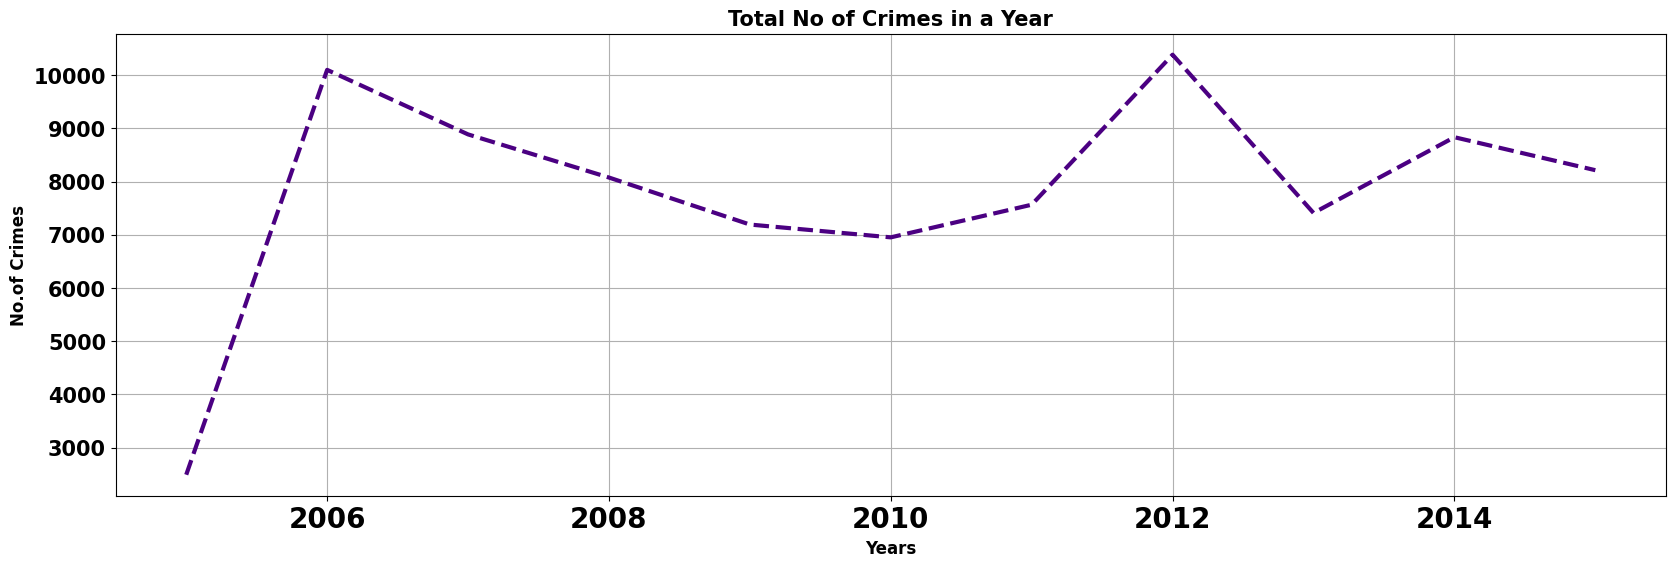

In [137]:
years_crime.plot(figsize=(20,6),kind='line',
                  markersize=20,
                  linewidth=3,color="indigo",linestyle="--")


mt.title("Total No of Crimes in a Year",fontweight='bold',size=15,color="black")
mt.xlabel("Years",fontweight='bold',size=12)
mt.ylabel("No.of Crimes",fontweight='bold',size=12)
mt.xticks(fontweight='bold',size=20,color="black")
mt.yticks(fontweight='bold',size=15,color="black")
mt.grid('lines')

In [113]:
Human_crime=df.groupby(['dYear',"driver_race"])['violation'].count().unstack()
Human_crime

driver_race,Asian,Black,Hispanic,Other,White
dYear,,,,,
2005,85,296,56,9,2043
2006,277,1205,198,24,8397
2007,240,1013,679,25,6931
2008,225,1088,841,23,5900
2009,214,1116,852,25,4986
2010,162,1023,810,29,4928
2011,207,1101,854,22,5382
2012,237,1446,1341,54,7308
2013,163,1174,1091,9,4974


In [114]:
mt.style.use('default')

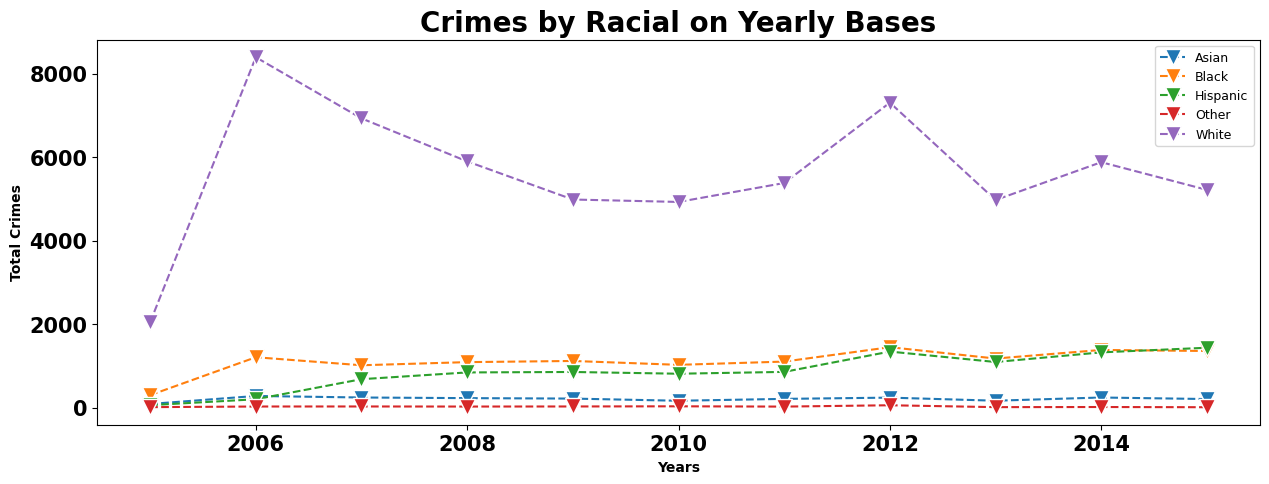

In [130]:
Human_crime.plot(kind='line',figsize=(15,5),marker='v',markersize=12,mec='white',linestyle="--")
mt.title("Crimes by Racial on Yearly Bases",fontweight="semibold",size=20)
mt.xlabel("Years",fontweight='bold',size=10)
mt.ylabel("Total Crimes",fontweight='bold',size=10)
mt.xticks(fontweight='semibold',size=15)
mt.yticks(fontweight='semibold',size=15)
mt.legend(loc=1,fontsize=9)

In [106]:
mt.style.use('bmh')

In [131]:
# Human_crime.plot(kind='line',figsize=(20,5),linewidth=2.5,marker='.',markersize=20,mec='white',linestyle="--")
# mt.legend(loc=1,fontsize=9)
# mt.xlabel("Years",fontweight='bold',size=10)
# mt.ylabel("Total Crimes",fontweight='bold',size=10)
# mt.xticks(fontweight='semibold',size=15)
# mt.yticks(fontweight='semibold',size=15)
# mt.legend(fontsize='large')
# mt.title("Crimes by Racial on Yearly Bases",fontweight="semibold",size=20)
# mt.savefig(r'C:\Users\hp\OneDrive\Desktop\Crimes_by_Racial_on_Yearly_Bases.jpeg')

In [69]:
fd=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\police.csv",parse_dates=['stop_date'],index_col="stop_date")
fd.head(3)

,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
stop_date,,,,,,,,,,,,,,
2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [70]:
crime_6=fd.loc['2006']["violation"].resample("M").count()
crime_6

C:\Users\hp\AppData\Local\Temp\ipykernel_84\2135701618.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  crime_6=fd.loc['2006']["violation"].resample("M").count()


stop_date
2006-01-31    1003
2006-02-28     731
2006-03-31     863
2006-04-30     899
2006-05-31     822
2006-06-30     763
2006-07-31     845
2006-08-31     825
2006-09-30     831
2006-10-31     856
2006-11-30     913
2006-12-31     791
Freq: ME, Name: violation, dtype: int64

In [72]:
mt.style.use("dark_background")

Text(0.5, 1.0, 'Montly Crime Based on 2006 Year')

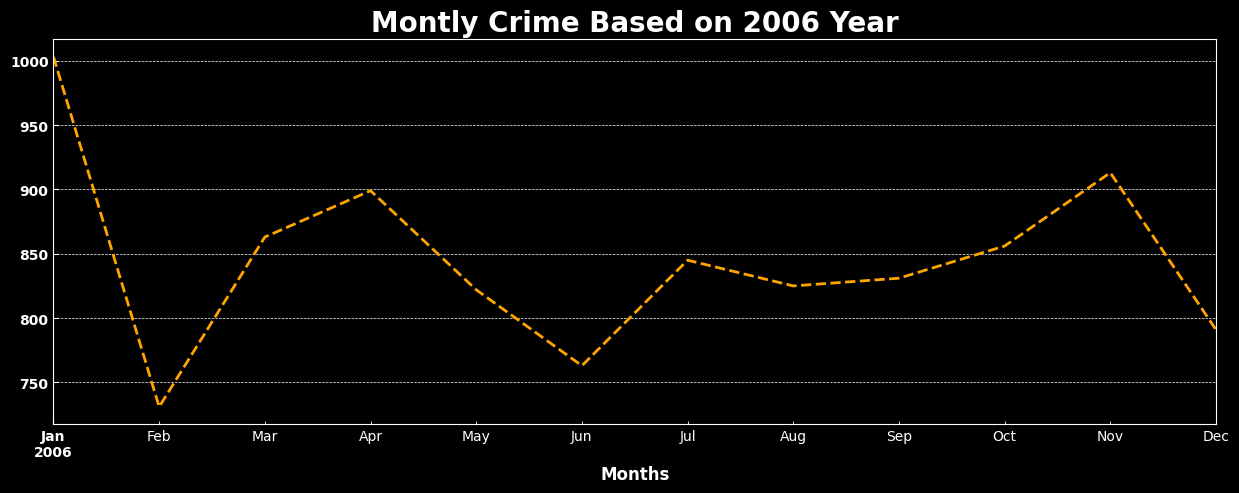

In [73]:
crime_6.plot(kind="line",figsize=(15,5),linewidth=2,linestyle="--",color='orange')
mt.xticks(fontweight='bold',size=10)
mt.xlabel("Months",fontweight='semibold',size=12)
mt.yticks(fontweight='bold',size=10)
mt.title("Montly Crime Based on 2006 Year",fontweight='bold',size=20)

In [74]:
crime_12=fd.loc['2012']["violation"].resample("M").count()
crime_12

C:\Users\hp\AppData\Local\Temp\ipykernel_84\1712921097.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  crime_12=fd.loc['2012']["violation"].resample("M").count()


stop_date
2012-01-31    1106
2012-02-29    1043
2012-03-31    1128
2012-04-30     933
2012-05-31     949
2012-06-30     949
2012-07-31     866
2012-08-31     893
2012-09-30     702
2012-10-31     654
2012-11-30     622
2012-12-31     551
Freq: ME, Name: violation, dtype: int64

In [75]:
mt.style.use("dark_background")

Text(0.5, 1.0, 'Montly Crime Based on 2012 Year')

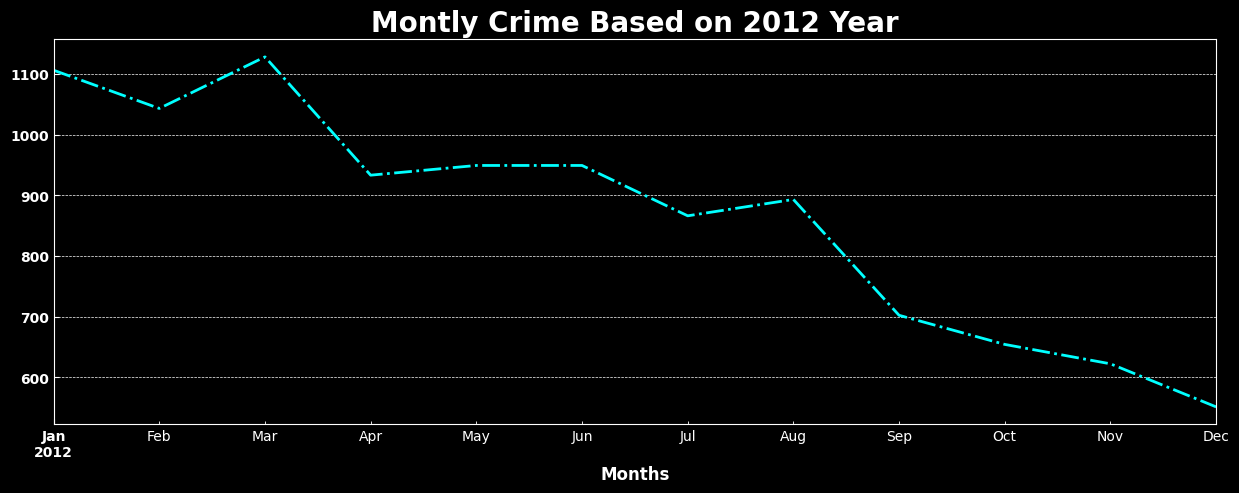

In [76]:
crime_12.plot(kind="line",figsize=(15,5),linestyle="-.",color="cyan",linewidth=2)

mt.xticks(fontweight='bold',size=10)
mt.xlabel("Months",fontweight='semibold',size=12)
mt.yticks(fontweight='bold',size=10)
mt.title("Montly Crime Based on 2012 Year",fontweight='bold',size=20)

In [77]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'dYear', 'dMonth'],
      dtype='object')

In [78]:
# crime_12=df.loc['2012'][["driver_race","violation"]].resample("M").count()
# crime_12

In [79]:
# df["MonthName"].unique()

In [80]:
# df.columns

In [81]:
# df["stop_date"].sort_values(ascending=True)

In [82]:
# dates_in_order=pd.date_range(start='2005-01-01',end='2015-12-31',freq='MS')

In [83]:
# df["MonthName"]=dates_in_order.map(lambda x:x.month_name()).to_list()

In [84]:
# df.columns

In [85]:
# sort_order=["jan",'Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct',"Nov","Dec"]

In [86]:
# df["MonthName"]=pd.CategoricalIndex(df["MonthName"],categories=["Jan",'Feb',
#                                                                 'Mar','Apr',
#                                                                 'May','Jun',
#                                                                 'Jul','Aug',
#                                                                 'Sept','Oct',
#                                                                 "Nov","Dec"],ordered=True)

In [87]:
# df["MonthName"]




In [88]:
# moc=df.groupby("MonthName")["violation"].count()
# moc.sort_values(ascending=False)

In [89]:
# moc1=df.groupby(["dMonth","violation"]).stop_date.count().unstack()
# moc1

In [90]:
# mt.style.use("dark_background")
# violence=raw.groupby("violence").size().reset_index(name='Total Count')
# vio=violence.sort_values(by="Total Count",ascending=False)
# vio.plot(kind="barh",x='violence',
#         color="mistyrose")

# mt.title("",fontweight='bold',size=20)
# mt.ylabel(" ")

In [91]:
# df["violation_raw"]=df["violation_raw"].str.split("/",expand=True).stack()
# df["violation_raw"]=pd.to_frame()
# df["violation"].columns=df["violation_raw"]
# df["violation"]=df["violation"].groupby(["violation"]).size().reset_index(name='Total Count')
# df["violation"]=df["violation"].sort_values(by=["Total Count"],ascending=False)
# df["violation"]

In [92]:
# charat=fd["Characters"].str.split(",",expand=True).stack()
# charat=charat.to_frame()
# charat.columns=["Actors"]
# actors=charat.groupby(["Actors"]).size().reset_index(name="Total Count")
# actors=actors.sort_values(by=["Total Count"],ascending=False)
# actors
